

# Part I - Ford GoBike System Data
## by Mahlatse Sophia Mbooi

## Introduction
> This presentation shows analysis of a dataset including information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for February 2019.





## Investigation Overview


> I am most interested in the bike users demographics and how that affects the bike lending behavior (frequency and duration)

Key insights:
> What is the distribution of the duration and age

> What is the average time spent on rentals by age 

> On average, which user type spends more time on the bike and what is their gender?

> On average, which gender spends more time with a bike throughout the week?



## Dataset Overview

> There are 183412 entries in the dataset with 16 features ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip')
The features contains numeric, dates, location (longitude, latitude), strings, and binary variables


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Wrangling efforts

#convert start_time and end_time to datetime objects
df['start_time'] = pd.to_datetime(df['start_time']) 
df['end_time'] = pd.to_datetime(df['end_time']) 
df[['start_time', 'end_time']].info()

#add more features to the dataset
df['start_day_of_month']= df.start_time.dt.day
df['end_day_of_month']= df.end_time.dt.day
df['days_between']= df.end_day_of_month - df.start_day_of_month
df['weekday_name'] = df.start_time.dt.weekday
df['age'] = df.start_time.dt.year- df.member_birth_year 

# remove ages over 110
df = df.query('age < 110')

#Convert duration_sec to duration in hours and minutes(more meaningful and relatable than seconds)
df['duration_hours'] = df.duration_sec/3600
df['duration_minutes'] = df.duration_sec/60

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
start_time    183412 non-null datetime64[ns]
end_time      183412 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.8 MB


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_day_of_month,end_day_of_month,days_between,weekday_name,age,duration_hours,duration_minutes
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,28,1,-27,3,35.0,14.495833,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,28,1,-27,3,47.0,17.181667,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,28,1,-27,3,30.0,10.136111,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,28,1,-27,3,45.0,0.440278,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,28,1,-27,3,60.0,0.498056,29.883333


In [4]:
#Function to add chart attributes
def add_chart_attr(title=None, x_axis=None, y_axis=None):
    if title:
        plt.title(title);
    if x_axis:
        plt.xlabel(x_axis)
    if x_axis:
        plt.ylabel(y_axis)
    
    

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What is the distribution of the duration and age

> The distribution of age is right skewed. There are more people in the age group between 20-40 who hire bikes. 
There are suprising ages of over 100 although according to records of oldest people, there is no person over the age of 120. 
[Wikipedia Reference](https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people#:~:text=The%20oldest%20known%20living%20person,than%20the%20100%20oldest%20men.)

> The hours are skewed to the right. There are more rentals that spend less than an hour although very few rentals get to spend 23 hours with the bike. 


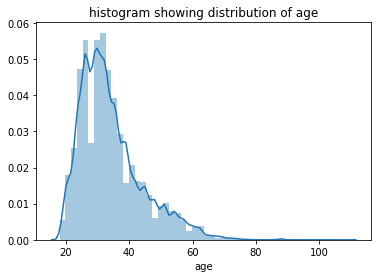

In [5]:
# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sns.distplot(df[df['age'].notna()]['age'])
add_chart_attr('histogram showing distribution of age');


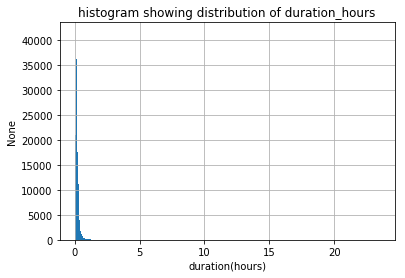

In [6]:
# histogram for duration in minutes
df['duration_hours'].hist(bins=500);
add_chart_attr('histogram showing distribution of duration_hours','duration(hours)');



## What is the average time spent on rentals by age 

> On average, 18 year olds spend the most time with the bike per individual, followed by 78 year olds. However, 30 and 31 year olds'  combined time spent with the bikes is the most at just above 2000 hours. In terms of the age group that frequents the bike rental, the 31 year olds are leading.


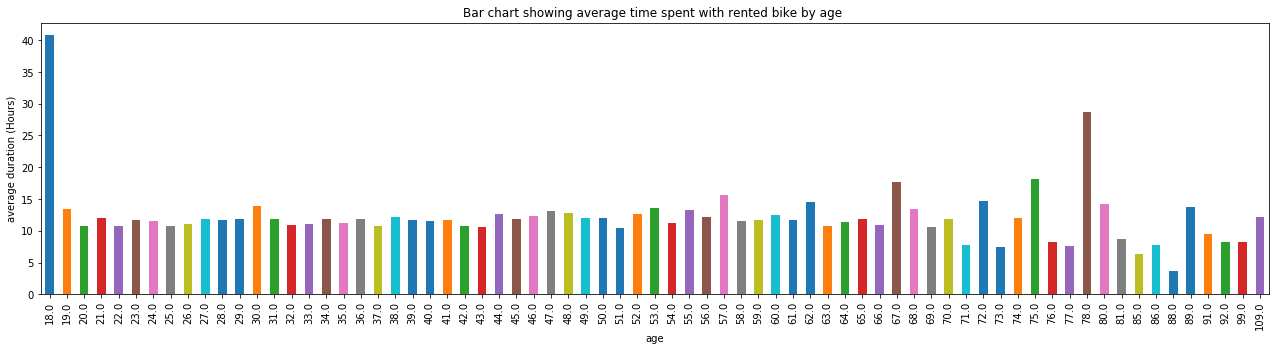

In [7]:
# average time spent with rented bike by age
df.groupby('age')['duration_minutes'].mean().plot(kind='bar',figsize=(22,5));
add_chart_attr('Bar chart showing average time spent with rented bike by age ',x_axis='age', y_axis='average duration (Hours)');


## On average, which user type spends more time on the bike and what is their gender?

> The customers spend more time with bikes, and the 'other' gender customer spends the most time with the bikes. Similarly, the 'other' gender subscriber spends the most time with bike than the male and female counterparts. 


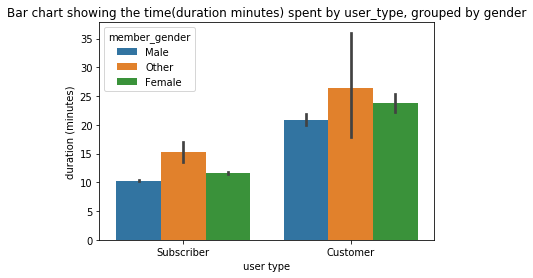

In [8]:
#convert user_type to categorical values and add to dataframe
user_classes = pd.api.types.CategoricalDtype(ordered=True, categories=df['user_type'].value_counts().keys())

# Use pandas.astype() to convert the  column from a plain object type into an ordered categorical type 
df['user_type'] = df['user_type'].astype(user_classes);
sns.barplot(data = df, x = 'user_type', y='duration_minutes', hue = 'member_gender');
add_chart_attr('Bar chart showing the time(duration minutes) spent by user_type, grouped by gender',x_axis='user type', y_axis='duration (minutes)');


## On average, which gender spends more time with a bike throughout the week?

> The 'other' gender consistently uses bikes for longer than the other genders across days of the week.


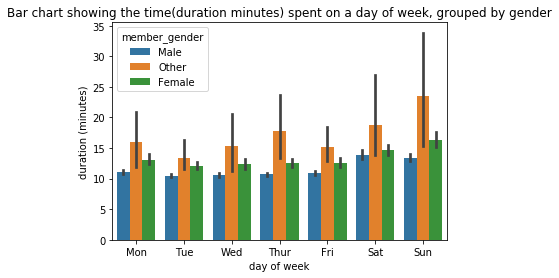

In [9]:
sns.barplot(data = df, x = 'weekday_name', y='duration_minutes', hue = 'member_gender');
plt.xticks([0,1, 2, 3, 4,5, 6], ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']);
add_chart_attr('Bar chart showing the time(duration minutes) spent on a day of week, grouped by gender',x_axis='day of week', y_axis='duration (minutes)');


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 284976 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 